<a href="https://colab.research.google.com/github/Kalabras/2024/blob/main/Imshow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

import cv2
import pandas
from skimage import io
import matplotlib
import regex
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.15.0
The following GPU devices are available: 


In [129]:

folder = "/content/drive/MyDrive/IndabaX2024/train/train"
import os
import regex as re
pattern = r"ID_(\d+)"
ids = []
def extract_ids(images_folder):
  ids = []
  for filename in os.listdir(images_folder):
    id = filename.split('.')[0]
    sub = re.findall(pattern, id)
    image_path = folder +"/"+filename
    iml = [int(sub[0]), image_path]
    im = tuple(iml)
    ids.append(im)
    ids.sort()
  return ids


In [130]:
from google.colab.patches import cv2_imshow

test = pandas.read_csv("/content/drive/MyDrive/IndabaX2024/Train.csv")
test_df = pandas.DataFrame(test)
for index, elem in enumerate(ids):
  id = elem[0]
  if index == 2:
    break
  for index, row in test_df.iterrows():
    class_id = row["ToothClass"]
    if (row["Image_ID"] == id):
      xmin = row["Xmin"]
      ymin = row["Ymin"]
      xmax = row["Xmax"]
      ymax = row["Ymax"]
      image = cv2.imread(elem[1])
      plt.imshow(image)
      plt.show()
      cv2.rectangle(elem[1], (xmin, ymin), (xmax, ymax), (36,255,12), 1)
      cv2.putText(image, class_id, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
      plt.imshow(image)
      plt.show()

Processing image: /content/drive/MyDrive/IndabaX2024/train/train/ID_000000.png


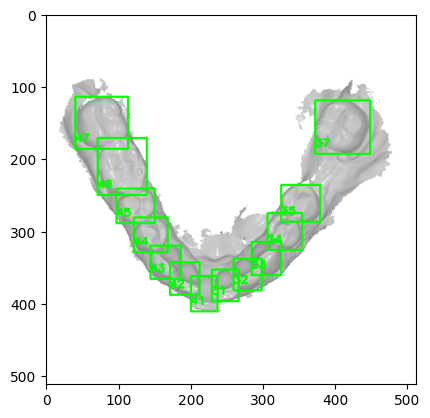

Processing image: /content/drive/MyDrive/IndabaX2024/train/train/ID_000001.png


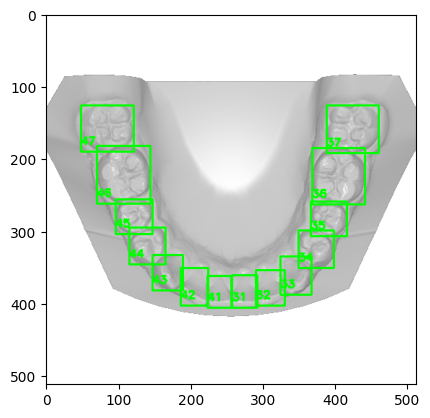

Processing image: /content/drive/MyDrive/IndabaX2024/train/train/ID_000002.png


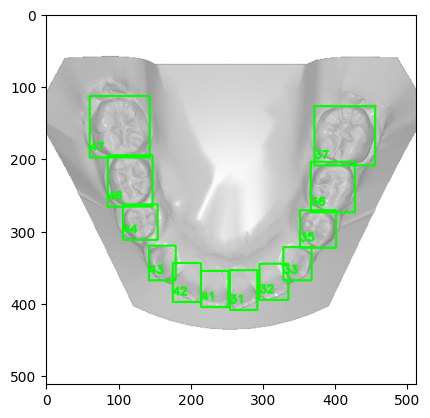

In [131]:
# prompt: putting a bounding box with a title on an image then showing it
#HOLY CODE
# Load the image
image = cv2.imread("/content/drive/MyDrive/IndabaX2024/train/train/ID_000000.png")
test = pandas.read_csv("/content/drive/MyDrive/IndabaX2024/Train.csv")
test_df = pandas.DataFrame(test)
ids = extract_ids(folder)
for index, elem in enumerate(ids):
  if index > 2:
    break
  id, image_path = elem  # Unpack the tuple elements
  print(f"Processing image: {image_path}")  # Print image path for verification
  image = cv2.imread(image_path)  # Read the image using OpenCV
  # Create a bounding box
  for index, row in test_df.iterrows():
    if row["Image_ID"] == id:
      class_id = str(row["ToothClass"])
      left = row["Xmin"]
      bottom = row["Ymin"]
      right = row["Xmax"]
      top = row["Ymax"]
      # top, bottom, left, right = 10, 100, 10, 100
      cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
      # Add a title
      cv2.putText(image, class_id, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
      # Display the image
  plt.imshow(image)
  plt.show()
